In [35]:
import pandas as pd

# Set pandas to display up to 50 columns in DataFrames.
pd.options.display.max_columns = 50

In [36]:
# Load employee attrition data from CSV file into a pandas DataFrame.

employees = pd.read_csv("employee_attrition.csv")

## Data Pre-Processing

In [37]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Binary Encode: Attrition, Gender, Over18, OverTime


In [38]:
# Convert categorical values to binary indicators:
# - "Attrition": 1 if "Yes", otherwise 0
# - "Gender": 1 if "Male", otherwise 0
# - "Over18": 1 if "Y", otherwise 0
# - "OverTime": 1 if "Yes", otherwise 0

employees["Attrition"] = employees["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
employees["Gender"] = employees["Gender"].apply(lambda x: 1 if x == "Male" else 0)
employees["Over18"] = employees["Over18"].apply(lambda x: 1 if x == "Y" else 0)
employees["OverTime"] = employees["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

In [39]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


One-Hot Encoding: BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [40]:
# Apply one-hot encoding to categorical features and remove original columns:
# - "BusinessTravel" is one-hot encoded.
# - "Department" is one-hot encoded with prefix "Department".
# - "EducationField" is one-hot encoded with prefix "Education".
# - "JobRole" is one-hot encoded with prefix "Role".
# - "MaritalStatus" is one-hot encoded with prefix "Status".

employees = employees.join(pd.get_dummies(employees["BusinessTravel"])).drop(columns=["BusinessTravel"], axis=1)
employees = employees.join(pd.get_dummies(employees["Department"], prefix="Department")).drop(columns=["Department"], axis=1)
employees = employees.join(pd.get_dummies(employees["EducationField"], prefix="Education")).drop(columns=["EducationField"], axis=1)
employees = employees.join(pd.get_dummies(employees["JobRole"], prefix="Role")).drop(columns=["JobRole"], axis=1)
employees = employees.join(pd.get_dummies(employees["MaritalStatus"], prefix="Status")).drop(columns=["MaritalStatus"], axis=1)

In [41]:
employees.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,...,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,...,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,...,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,...,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,...,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [42]:
# Map boolean values to binary integers:
# - Convert `True` to 1
# - Convert `False` to 0
# - Leave other values unchanged

employees = employees.map(lambda x: 1 if x is True else 0 if x is False else x)

In [43]:
employees.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,...,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,...,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,...,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [44]:
# Import matplotlib's pyplot module for creating plots and visualizations.

import matplotlib.pyplot as plt

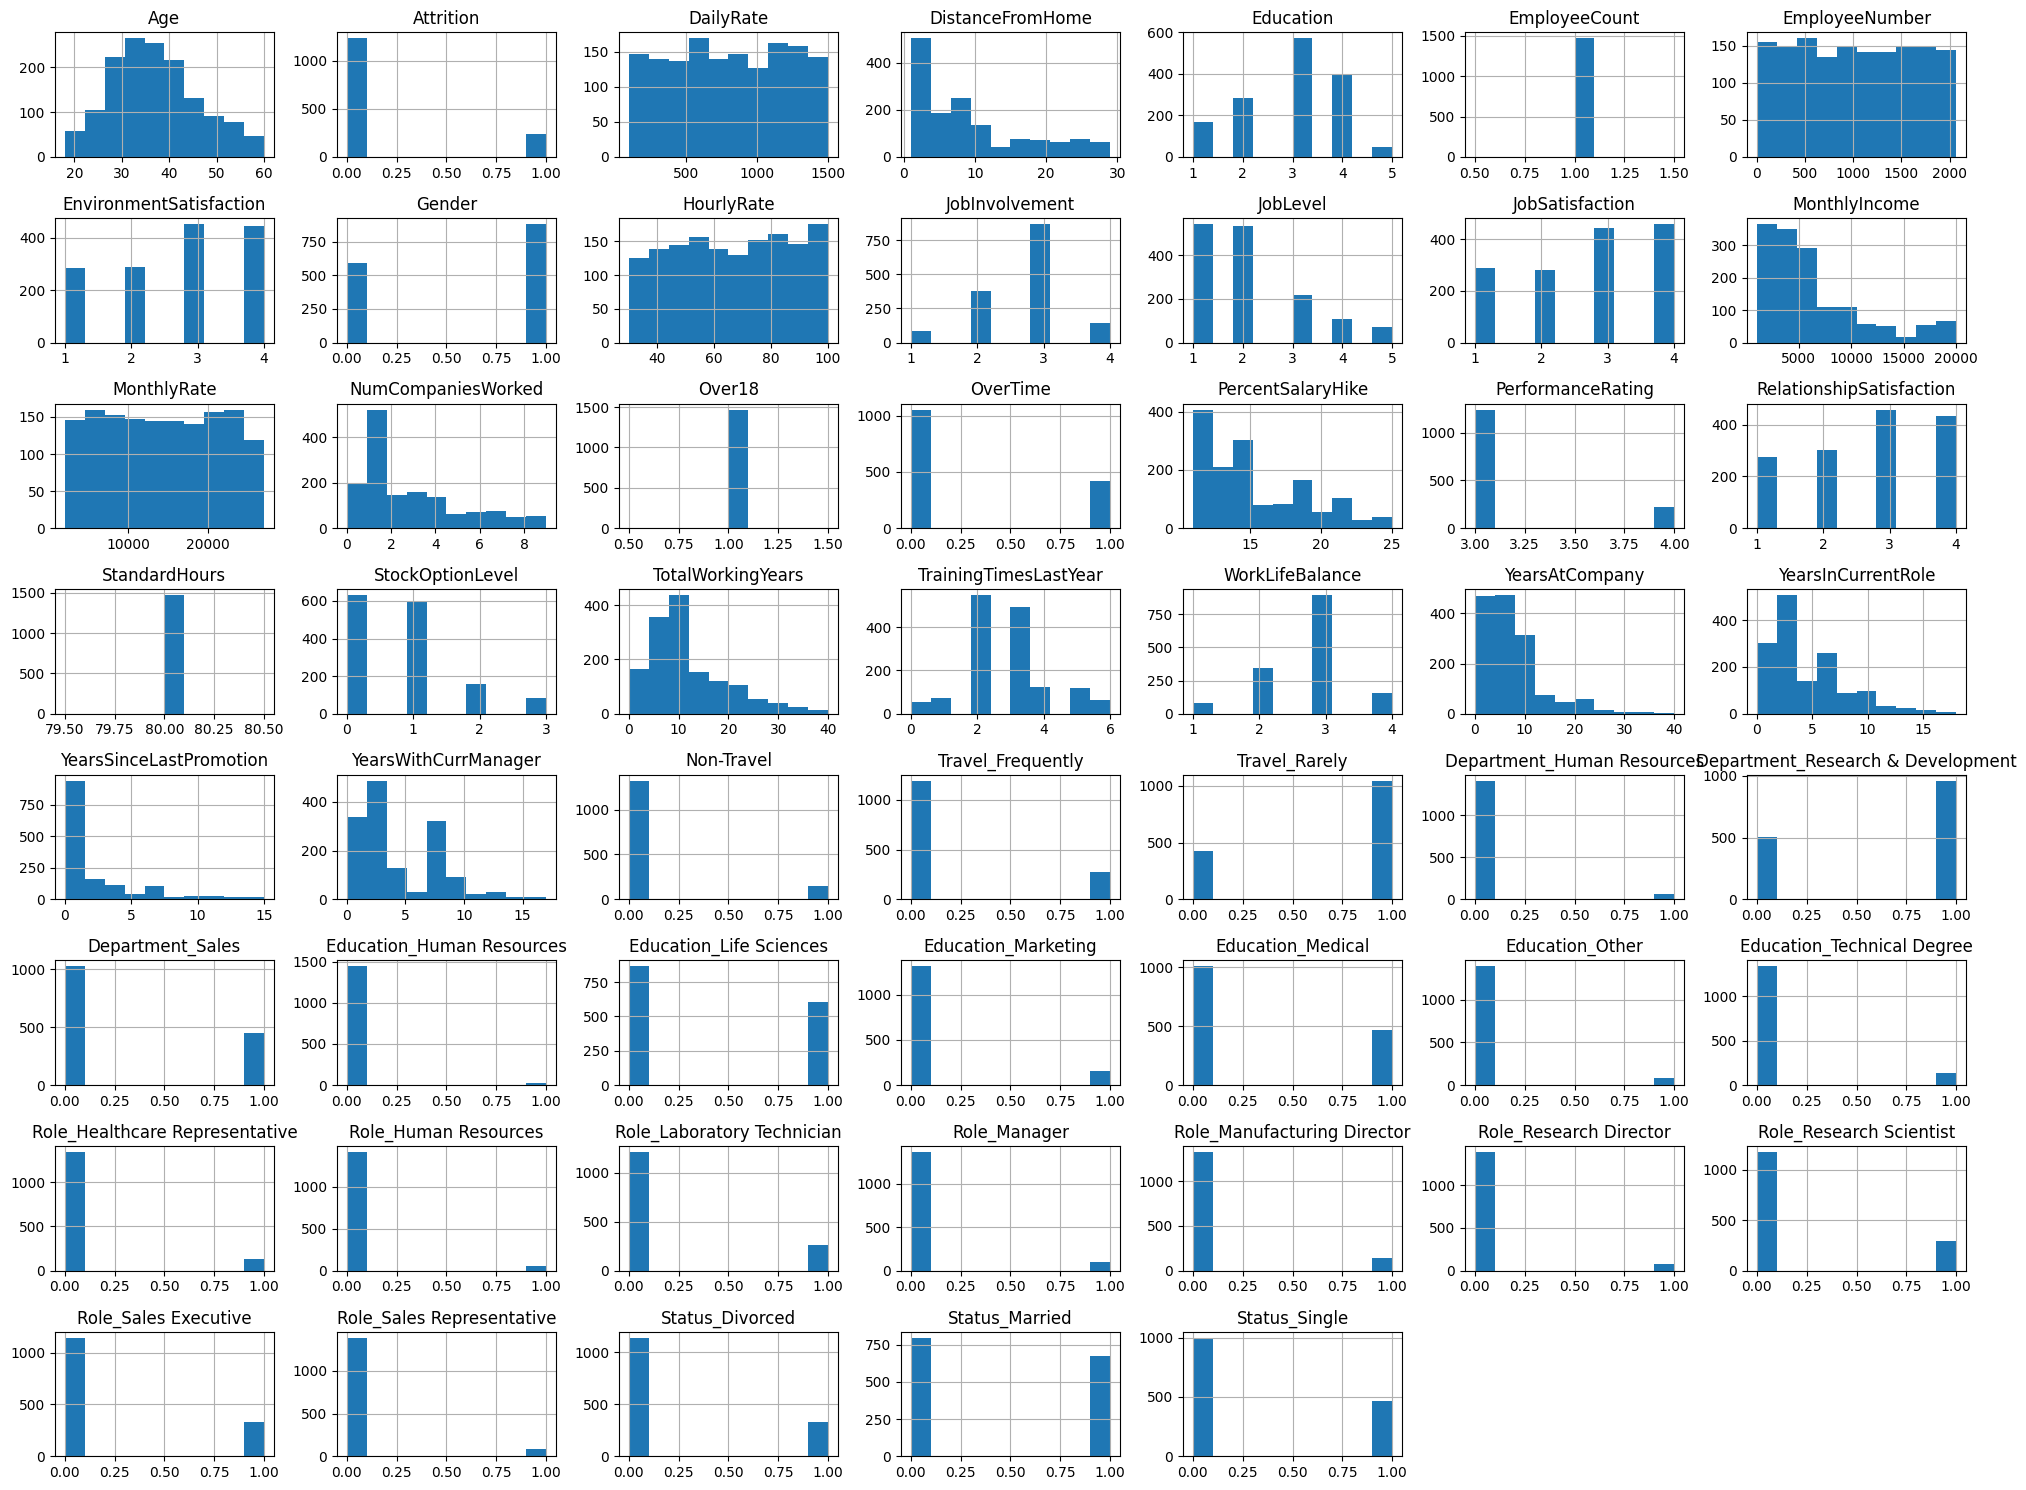

In [45]:
# Plot histograms for all numeric features in the DataFrame.
# - `figsize` specifies the size of the figure.
# - `plt.tight_layout()` adjusts subplot parameters for a cleaner layout.
# - `plt.show()` displays the plots.

employees.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

What to drop: EmployeeCount, Over18, StandardHours,

In [46]:
# Remove unnecessary columns from the DataFrame:
# - "EmployeeCount", "Over18", and "StandardHours" are dropped.
# - `inplace=True` modifies the DataFrame directly.

employees.drop(columns=["EmployeeCount", "Over18", "StandardHours"], axis=1, inplace=True)

## Model Training

In [47]:
# Import the RandomForestClassifier for constructing ensemble-based classification models.
# Import train_test_split for partitioning the dataset into training and testing subsets for model evaluation.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [48]:
# Separate the features and target variable:
# - `X` contains all columns except "Attrition" (features).
# - `y` contains the "Attrition" column (target variable).

X, y = employees.drop(columns=["Attrition"], axis=1), employees['Attrition']

In [49]:
# Split the data into training and testing sets:
# - `X_train` and `y_train` are used for training the model.
# - `X_test` and `y_test` are used for evaluating the model.
# - `test_size=0.2` specifies that 20% of the data will be allocated to the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
# Initialize the RandomForestClassifier with parallel processing enabled (`n_jobs=-1`).
# Fit the model to the training data (`X_train` and `y_train`).

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [51]:
# Evaluate the model's performance on the test set by calculating the accuracy score.
# - `X_test` and `y_test` are used to assess how well the model generalizes to unseen data.

model.score(X_test, y_test)

0.8707482993197279

In [52]:
# Extract feature names and their corresponding importance scores from the model.
# Sort the features by their importance scores in descending order.
# Create a dictionary with sorted feature importances for easier interpretation.

feature_names = model.feature_names_in_
importances = model.feature_importances_

# Combine feature names with their importances and sort them.
sorted_importances = dict(sorted(zip(feature_names, importances), key=lambda item: item[1], reverse=True))

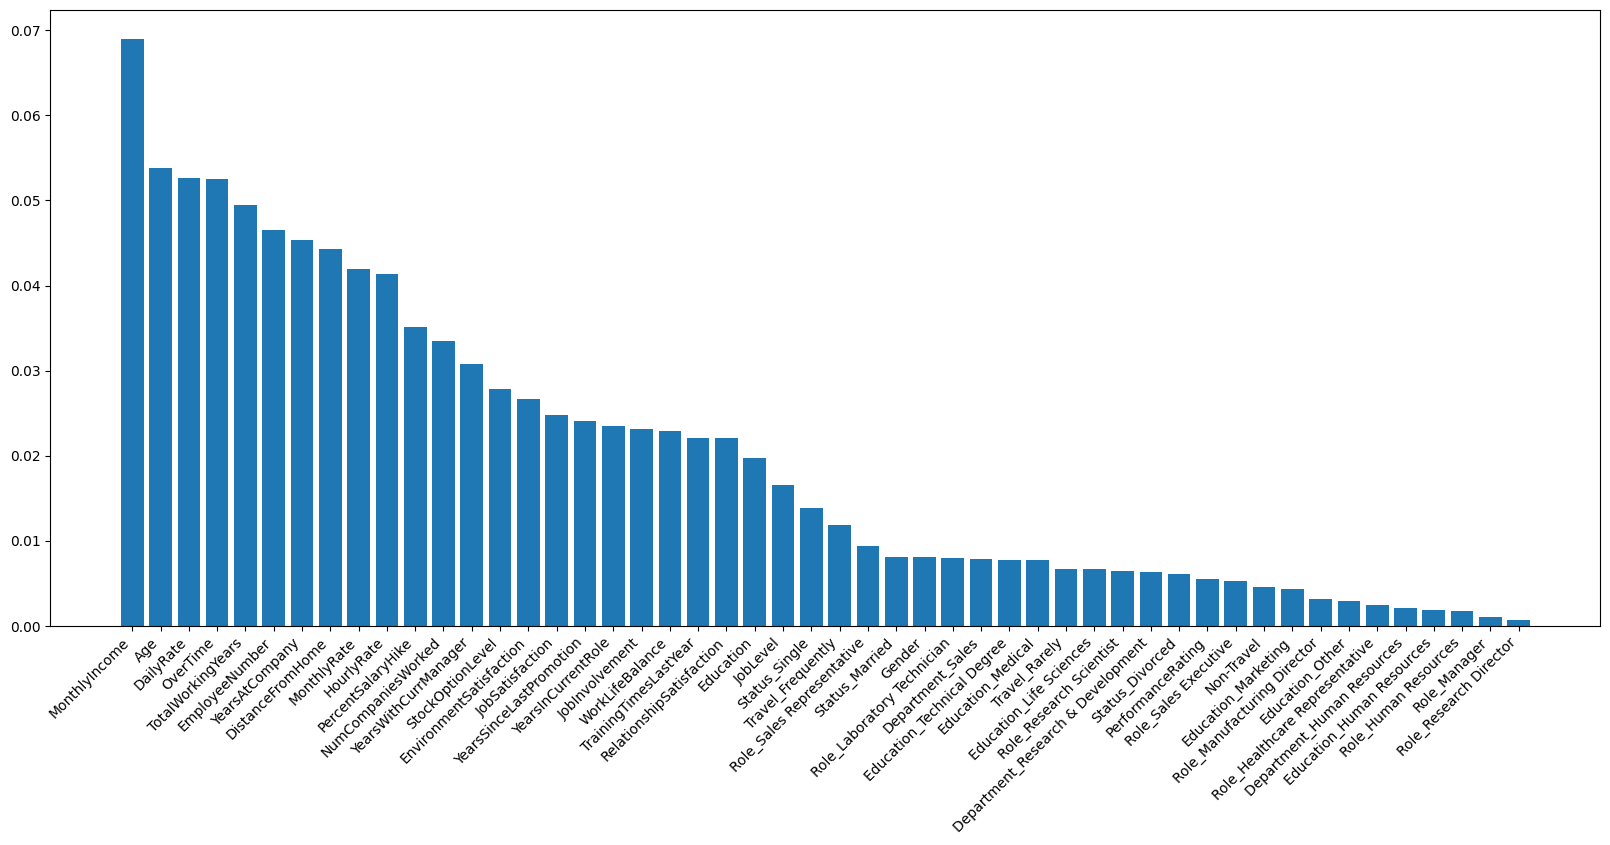

In [53]:
# Plot a bar chart of feature importances.
# - `figsize=(20, 8)` sets the size of the figure.
# - Bars are plotted with feature names on the x-axis and their importance scores on the y-axis.
# - `xticks(rotation=45, ha="right")` rotates the x-axis labels for better readability.

plt.figure(figsize=(20, 8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha="right")
plt.show()

## Make the model more performant

In [54]:
# Import the Optuna library for hyperparameter optimization.
# Import cross_val_score for performing cross-validation to assess model performance.

import optuna
from sklearn.model_selection import cross_val_score

In [55]:
def objective(trial) -> float:
    # Define hyperparameters to be optimized using Optuna.
    # - `n_estimators`: Number of trees in the forest (range: 100 to 400).
    # - `max_depth`: Maximum depth of each tree (range: 10 to 50).
    # - `min_samples_split`: Minimum number of samples required to split an internal node (range: 2 to 32).
    # - `min_samples_leaf`: Minimum number of samples required to be at a leaf node (range: 1 to 32).

    n_estimators = trial.suggest_int("n_estimators", 100, 400)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)

    # Initialize the RandomForestClassifier with the sampled hyperparameters.
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # Perform cross-validation to evaluate the model's performance.
    # - `cv=3` specifies 3-fold cross-validation.
    # - `scoring="neg_mean_squared_error"` measures the negative mean squared error.
    # - `n_jobs=-1` uses all available processors for computation.
    scores: list[float] = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

    # Calculate the mean score from cross-validation.
    mean_score = scores.mean()

    # Return the negative mean score for Optuna to minimize.
    return -mean_score

In [56]:
# Create an Optuna study object to optimize the objective function.
# - `direction="maximize"` specifies that the objective function's return value should be maximized.
# - `sampler=optuna.samplers.RandomSampler()` uses random sampling for hyperparameter optimization.

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler())

[I 2024-09-08 15:05:19,133] A new study created in memory with name: no-name-49e30dd8-926a-43c5-89aa-627754d986bc


In [57]:
# Execute the optimization process for 200 trials.
# - `objective` is the function to be optimized.
# - `n_trials=200` specifies the number of different hyperparameter combinations to evaluate.

study.optimize(objective, n_trials=200)

[I 2024-09-08 15:05:31,669] Trial 0 finished with value: 0.16326530612244897 and parameters: {'n_estimators': 306, 'max_depth': 26, 'min_samples_split': 30, 'min_samples_leaf': 24}. Best is trial 0 with value: 0.16326530612244897.
[I 2024-09-08 15:05:35,410] Trial 1 finished with value: 0.15901360544217688 and parameters: {'n_estimators': 391, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.16326530612244897.
[I 2024-09-08 15:05:36,717] Trial 2 finished with value: 0.15051020408163265 and parameters: {'n_estimators': 340, 'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.16326530612244897.
[I 2024-09-08 15:05:37,125] Trial 3 finished with value: 0.15391156462585034 and parameters: {'n_estimators': 105, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.16326530612244897.
[I 2024-09-08 15:05:38,243] Trial 4 finished with value: 0.1598639455782313 and 

In [58]:
# Retrieve the best hyperparameter values found during the optimization process.
# - `best_params` contains the hyperparameter configuration that yielded the highest score.

best_params = study.best_params

In [59]:
# Visualize the optimization history of the study.
# - `plot_optimization_history(study)` shows the evolution of the objective function's value over trials.

optuna.visualization.plot_optimization_history(study)

In [60]:
# Visualize the distribution of objective function values across different hyperparameter values.
# - `plot_slice(study, params=[...])` displays how the objective function varies with each specified hyperparameter.
# - `params` includes the hyperparameters of interest: "n_estimators", "max_depth", "min_samples_split", and "min_samples_leaf".

optuna.visualization.plot_slice(study, params=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf"])

In [61]:
# Visualize the importance of each hyperparameter in the optimization process.
# - `plot_param_importances(study)` shows which hyperparameters had the most significant impact on the objective function.

optuna.visualization.plot_param_importances(study)

In [62]:
# Extract the best hyperparameter values from the optimization results.
# - `best_n_estimators` retrieves the optimal number of trees in the forest.
# - `best_max_depth` retrieves the optimal maximum depth of each tree.
# - `best_min_samples_split` retrieves the optimal minimum number of samples required to split an internal node.
# - `best_min_samples_leaf` retrieves the optimal minimum number of samples required to be at a leaf node.

best_n_estimators = best_params["n_estimators"]
best_max_depth = best_params["max_depth"]
best_min_samples_split = best_params["min_samples_split"]
best_min_samples_leaf = best_params["min_samples_leaf"]

In [63]:
# Initialize the RandomForestClassifier with the best hyperparameters found during optimization.
# - `n_estimators` is set to the optimal number of trees.
# - `max_depth` is set to the optimal maximum depth of each tree.
# - `min_samples_split` is set to the optimal minimum number of samples required to split an internal node.
# - `min_samples_leaf` is set to the optimal minimum number of samples required to be at a leaf node.
best_model: RandomForestClassifier = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf
)

In [64]:
# Train the RandomForestClassifier with the optimal hyperparameters on the training data.
# - `X_train` and `y_train` are used to fit the model.

best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=31, min_samples_split=26,
                       n_estimators=282)

In [65]:
# Evaluate the performance of the trained model on the test set.
# - `X_test` and `y_test` are used to compute the accuracy of the model.

best_model.score(X_test, y_test)

0.8503401360544217

In [66]:
# Import metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import sqrt for calculating RMSE
from math import sqrt

In [67]:
# Predict target values for the test set using the trained model.
y_predict = best_model.predict(X_test)

# Output the evaluation metrics for the model:
# R2 score: Measures the proportion of variance explained by the model.
# Mean Absolute Error (MAE): Average absolute error between predicted and actual values.
# Mean Squared Error (MSE): Average squared error between predicted and actual values.
# Root Mean Squared Error (RMSE): Square root of the MSE, representing the standard deviation of prediction errors.
print(f"R2 score: {r2_score(y_test, y_predict)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_predict)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_predict)}")
print(f"Root Mean Squared Error (RMSE): {sqrt(mean_squared_error(y_test, y_predict))}")

R2 score: -0.17599999999999993
Mean Absolute Error (MAE): 0.14965986394557823
Mean Squared Error (MSE): 0.14965986394557823
Root Mean Squared Error (RMSE): 0.3868589716493314


In [68]:
import pickle

try:
    # Open a file named "model.pkl" in write binary mode
    with open("model.pkl", "wb") as file:
        # Dump the best_model object into the file
        pickle.dump(best_model, file)
        # Print a success message if the model is successfully saved
        print("Model successfully saved to 'model.pkl'.")
except Exception as e:
    # Print an error message if there is an exception while saving the model
    print(f"An error occurred while saving the model: {e}")

Model successfully saved to 'model.pkl'.
